In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Position_Salaries.csv")
dropped_cols = ["Position","Salary"]
X = df.drop(dropped_cols,axis = 1)
Y = df["Salary"]

In [3]:
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [4]:
Y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

In [5]:
# Now we need to reshape our y variable so that we can use the standard scaler class
Y = np.array(Y).reshape(len(Y),1)
Y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
sc_Y = StandardScaler()
Y = sc_Y.fit_transform(Y)

In [7]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [8]:
Y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [12]:
Y = Y.reshape(len(Y))
from sklearn.svm import SVR
regressor = SVR(kernel="rbf") # Radial Basis Function
regressor.fit(X,Y)

SVR()

### Since we have transformed our Y as well, we need to reverse the transformation to obtain the actual result and this can be done using the `inverse_transform()` function

In [16]:
sc_Y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

C:\miniconda\MINICONDA_WORKSPACE\Machine_Learning_A_To_Z\Regression\Support_Vector_Regression\env\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[170370.0204065]])

ValueError: Expected 2D array, got 1D array instead:
array=[-0.6197853  -0.62924694 -0.56788994 -0.49732233 -0.44690338 -0.36617206
 -0.14115569  0.28557658  0.78226531  1.08559794].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

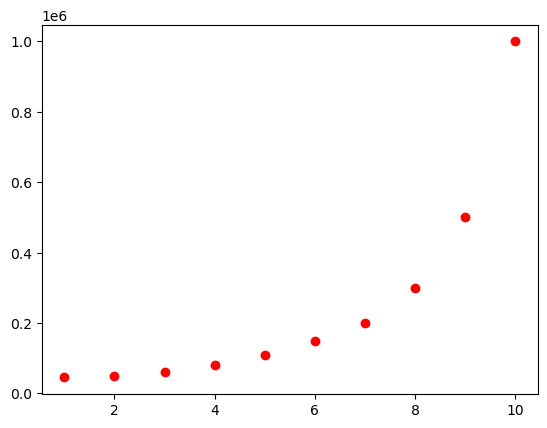

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming regressor is your SVR model, X is your feature matrix, and Y is your target variable

# Predictions using the SVR model
m = regressor.predict(X)

# Reshape X and Y to make them 2D arrays
X_reshaped = X.reshape(-1, 1)
Y_reshaped = Y_reshaped.reshape(-1, 1)

# Scatter plot for actual data
plt.scatter(sc_X.inverse_transform(X_reshaped), sc_Y.inverse_transform(Y_reshaped), color='red', label='Actual')

# Line plot for SVR predictions
plt.plot(sc_X.inverse_transform(X_reshaped), sc_Y.inverse_transform(m), color='blue', label='SVR Prediction')

plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend()
plt.show()

# Generating a grid for smoother visualization
X_grid = np.arange(min(sc_X.inverse_transform(X_reshaped)), max(sc_X.inverse_transform(X_reshaped)), 0.1).reshape(-1, 1)
k = regressor.predict(sc_X.transform(X_grid))

# Scatter plot for actual data
plt.scatter(sc_X.inverse_transform(X_reshaped), sc_Y.inverse_transform(Y_reshaped), color='red', label='Actual')

# Line plot for SVR predictions on the grid
plt.plot(X_grid, sc_Y.inverse_transform(k), color='blue', label='SVR Prediction')

plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend()
plt.show();